# 分析2018年1-12月韓陳的message，再拿SVM訓練的model來判斷各媒體的立場

Han and Chen's comment count from 1-12 month

Text(0, 0.5, 'comment_count')

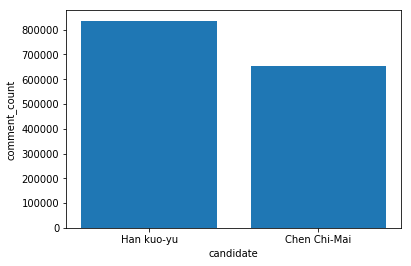

In [33]:
import csv, os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

path = 'C:/Users/Perry/Downloads/drive-download-20190320T121356Z-001'
csvFile = []
for i in range(1, 10):
    fh = open(os.path.join(path, '20180'+str(i)+'_data.csv'), 'r', encoding = 'utf-8')
    csvFile.append(pd.read_csv(fh))
    fh.close()
for i in range(10, 13):
    fh = open(os.path.join(path, '2018'+str(i)+'_data.csv'), 'r', encoding = 'utf-8')
    csvFile.append(pd.read_csv(fh))
    fh.close()
# fh = open(os.path.join(path, '201809_data.csv'), 'r', encoding = 'utf-8')
# file = pd.read_csv(fh)

#csvFile is a list
#pd.concat() has to be a list
file = pd.concat(csvFile, axis = 0)
#file is a dataframe
#print(file)
name = ['韓國瑜', '陳其邁 Chen Chi-Mai']
comment_count = []
#page_select for Page_Name contains Han and Chen
page_select = []
for index in range(0, 2):
    #Page_Name containing Han or Chen 
    page_select.append(file['Page_Name'].str.contains(name[index]))
    comment_count.append(sum(file[page_select[index]]['Comment_Count']))

han = file[page_select[0]]
chen = file[page_select[1]]

# print(comment_count)

candidate = ['Han kuo-yu', 'Chen Chi-Mai']
plt.bar(candidate, comment_count)
plt.xlabel('candidate')
plt.ylabel('comment_count')

Han and Chen's like count from 1-12 month

[6571105, 2847149]


Text(0, 0.5, 'like_count')

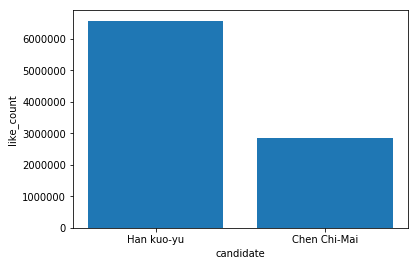

In [2]:
like_count = []
for index in range(0, 2):
    like_count.append(sum(file[page_select[index]]['LIKE_COUNT']))

print(like_count)

candidate = ['Han kuo-yu', 'Chen Chi-Mai']
plt.bar(candidate, like_count)
plt.xlabel('candidate')
plt.ylabel('like_count')

Compare Han and Chen's LIKE_COUNT trend from June to September

Text(0.5, 1.0, 'LIKE_COUNT')

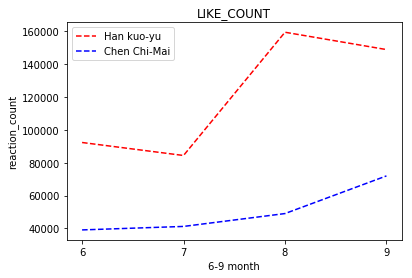

In [4]:
all_reaction = ['LIKE_COUNT', 'WOW_COUNT', 'LOVE_COUNT', 'HAHA_COUNT', 'SAD_COUNT', 'ANGRY_COUNT']
month = [6, 7, 8, 9]
reaction_count = {}
#create a dictionary with empty list for each reaction 
for feel in all_reaction:
    reaction_count[feel] = []

#Han's data
name_select = []
#read month 6-9 csv
for index in month:
    fh = open(os.path.join(path, '20180'+str(index)+'_data.csv'), 'r', encoding = 'utf-8')
    file = pd.read_csv(fh)
    name_select.append(file[file.loc[:, 'Page_Name'] == '韓國瑜'])
    fh.close()

for feel in all_reaction:
    for index in range(0, 4):
        reaction_count[feel].append(sum(name_select[index][feel]))
plt.plot(month, reaction_count['LIKE_COUNT'], 'r--', label='Han kuo-yu')

#create a dictionary with empty list for each reaction
for feel in all_reaction:
    reaction_count[feel] = []

#Chen's data
name_select = []
#read month 6-9 csv
for index in month:
    fh = open(os.path.join(path, '20180'+str(index)+'_data.csv'), 'r', encoding = 'utf-8')
    file = pd.read_csv(fh)
    name_select.append(file[file.loc[:, 'Page_Name'] == '陳其邁 Chen Chi-Mai'])
    fh.close()

for feel in all_reaction:
    for index in range(0, 4):
        reaction_count[feel].append(sum(name_select[index][feel]))
        fh.close()
plt.plot(month, reaction_count['LIKE_COUNT'], 'b--', label='Chen Chi-Mai')

#line_color = ['r--', 'ro', 'b--', 'bo', 'g--', 'go']


plt.legend(loc='upper left')
plt.xticks(np.arange(6, 10, 1))

plt.xlabel('6-9 month')
plt.ylabel('reaction_count')
plt.title('LIKE_COUNT')

#print(reaction_count['LIKE_COUNT'][0])
#print(reaction_count['WOW_COUNT'][0])

In [4]:
!pip install jieba

^C


In [3]:
import nltk
import jieba
import jieba.posseg as pseg
from collections import Counter

韓國瑜1-12月發文常用詞彙

In [29]:
han_message = han['Message']
han_message = han_message.astype(str)
han_message_list = list(han_message)

stop_list = [line.strip() for line in open('停用詞.txt','r+', encoding = 'utf-8')]
stop_list[0] = '$'
stop_list.extend(['\n', ' ', '/', ':', '#', '-', '%', 'nan', '【', '】', '(', ')', '=', ',', '&', '\u3000'])
# print(stop_list)

for stopword in stop_list:
    han_message_list = [word.replace(stopword, '') for word in han_message_list]

# print(han_message_list)


han_word = []
for i in range(len(han_message_list)):
     for k in jieba.cut(han_message_list[i].strip(), cut_all = False):
        han_word.append(k)

# print(han_word)
han_word = sorted(Counter(han_word).items(), key = lambda x:x[1], reverse = True)
han_word = han_word[0:200]
han_word

[('韓國瑜', 1919),
 ('高雄市', 1069),
 ('高雄', 664),
 ('長', 565),
 ('支持', 393),
 ('說', 358),
 ('陳', 289),
 ('年', 276),
 ('國民黨', 257),
 ('黨', 247),
 ('表示', 231),
 ('月', 214),
 ('政治', 198),
 ('選舉', 195),
 ('會', 189),
 ('主委', 187),
 ('日', 187),
 ('更', 181),
 ('請', 175),
 ('進黨', 166),
 ('沒', 156),
 ('參選', 154),
 ('朋友', 151),
 ('政府', 149),
 ('黨部', 138),
 ('分享', 137),
 ('台灣', 137),
 ('未', 135),
 ('市長', 133),
 ('做', 122),
 ('影片', 119),
 ('城市', 111),
 ('直播', 110),
 ('選', 110),
 ('非常', 109),
 ('民進', 109),
 ('時間', 104),
 ('新聞', 104),
 ('想', 103),
 ('提名', 103),
 ('活動', 103),
 ('發展', 100),
 ('中', 99),
 ('黃', 97),
 ('台北', 97),
 ('問題', 95),
 ('聽', 95),
 ('抹黑', 95),
 ('議員', 94),
 ('努力', 90),
 ('時', 88),
 ('錢', 86),
 ('成立', 86),
 ('公司', 85),
 ('臺', 83),
 ('家', 83),
 ('!', 82),
 ('鄉親', 82),
 ('感謝', 80),
 ('中央', 80),
 ('新', 80),
 ('市場', 80),
 ('吃', 78),
 ('歡迎', 78),
 ('🔔', 78),
 ('教育', 77),
 ('選戰', 77),
 ('前', 76),
 ('👉', 76),
 ('加油', 75),
 ('工作', 74),
 ('輕', 74),
 ('青年', 73),
 ('競選', 73),
 ('走', 72),
 ('民主', 

Text(0, 0.5, '次數')

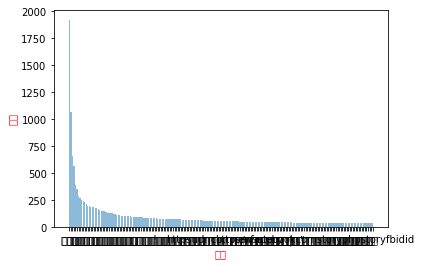

In [30]:
plt.rcParams['font.sans-serif'] = ['simhei']

han_list = [row[0] for row in han_word]
han_count = [row[1] for row in han_word]

# plt.figure(figsize=(20, 50))
plt.bar(han_list,han_count, alpha = 0.5)
plt.xlabel('字詞', color = 'red')
plt.ylabel('次數', color = 'red')

In [31]:
chen_message = chen['Message']
chen_message = chen_message.astype(str)
chen_message_list = list(chen_message)

stop_list = [line.strip() for line in open('停用詞.txt','r+', encoding = 'utf-8')]
stop_list[0] = '$'
stop_list.extend(['\n', ' ', '/', ':', '#', '-', '%', 'nan', '【', '】', '(', ')', '=', ',', '&', '\u3000'])
# print(stop_list)

for stopword in stop_list:
    chen_message_list = [word.replace(stopword, '') for word in chen_message_list]


chen_word = []
for i in range(len(chen_message_list)):
     for k in jieba.cut(chen_message_list[i].strip(), cut_all = False):
        chen_word.append(k)

chen_word = sorted(Counter(chen_word).items(), key = lambda x:x[1], reverse = True)
chen_word = chen_word[0:200]
chen_word

[('—', 1401),
 ('高雄', 1018),
 ('陳', 721),
 ('高雄市', 466),
 ('長', 466),
 ('發展', 385),
 ('城市', 385),
 ('智慧', 372),
 ('未', 328),
 ('年', 325),
 ('✨', 296),
 ('更', 295),
 ('陳邁', 283),
 ('台灣', 275),
 ('支持', 275),
 ('市長', 261),
 ('相信', 257),
 ('產業', 251),
 ('朋友', 228),
 ('會', 201),
 ('表示', 184),
 ('市民', 183),
 ('說', 180),
 ('文化', 179),
 ('轉型', 168),
 ('官方', 167),
 ('中心', 158),
 ('生活', 148),
 ('新', 142),
 ('科技', 141),
 ('推動', 141),
 ('加速', 129),
 ('中', 128),
 ('做', 125),
 ('加入', 124),
 ('政府', 123),
 ('立委', 120),
 ('問題', 118),
 ('挺', 118),
 ('非常', 118),
 ('捐款', 118),
 ('成立', 116),
 ('政治', 116),
 ('政策', 115),
 ('@', 111),
 ('提供', 109),
 ('chimai', 109),
 ('提出', 107),
 ('直播', 106),
 ('站', 105),
 ('成', 101),
 ('時', 100),
 ('努力', 100),
 ('邁', 99),
 ('世界', 97),
 ('追', 96),
 ('出席', 95),
 ('交通', 92),
 ('建設', 92),
 ('市場', 91),
 ('醫療', 90),
 ('觀光', 90),
 ('整合', 88),
 ('解決', 88),
 ('日', 87),
 ('機會', 87),
 ('金融', 85),
 ('升級', 84),
 ('議員', 84),
 ('協助', 83),
 ('感謝', 82),
 ('👉', 82),
 ('～', 78),
 ('工作', 78),


Text(0, 0.5, '次數')

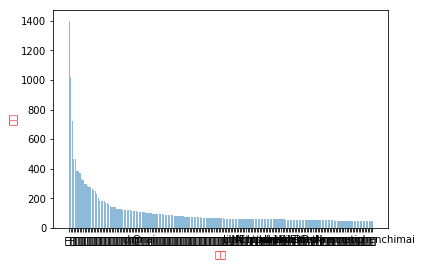

In [32]:
plt.rcParams['font.sans-serif'] = ['simhei']

chen_list = [row[0] for row in chen_word]
chen_count = [row[1] for row in chen_word]

# plt.figure(figsize=(20, 50))
plt.bar(chen_list,chen_count, alpha = 0.5)
plt.xlabel('字詞', color = 'red')
plt.ylabel('次數', color = 'red')

# 結論

#韓國瑜的臉書和其粉絲團的發文按讚從7到8月有很明顯的上升
#韓過於的臉書發文或被按讚的次數都遠高於陳其邁，顯示其聲勢較大
#可以看出韓國瑜和陳其邁的臉書或其粉絲團的用詞相當的不同